In [ ]:
# !conda install -c conda-forge librosa

In [24]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import soundfile as sf
sf.available_formats()

{'AIFF': 'AIFF (Apple/SGI)',
 'AU': 'AU (Sun/NeXT)',
 'AVR': 'AVR (Audio Visual Research)',
 'CAF': 'CAF (Apple Core Audio File)',
 'FLAC': 'FLAC (Free Lossless Audio Codec)',
 'HTK': 'HTK (HMM Tool Kit)',
 'SVX': 'IFF (Amiga IFF/SVX8/SV16)',
 'MAT4': 'MAT4 (GNU Octave 2.0 / Matlab 4.2)',
 'MAT5': 'MAT5 (GNU Octave 2.1 / Matlab 5.0)',
 'MPC2K': 'MPC (Akai MPC 2k)',
 'OGG': 'OGG (OGG Container format)',
 'PAF': 'PAF (Ensoniq PARIS)',
 'PVF': 'PVF (Portable Voice Format)',
 'RAW': 'RAW (header-less)',
 'RF64': 'RF64 (RIFF 64)',
 'SD2': 'SD2 (Sound Designer II)',
 'SDS': 'SDS (Midi Sample Dump Standard)',
 'IRCAM': 'SF (Berkeley/IRCAM/CARL)',
 'VOC': 'VOC (Creative Labs)',
 'W64': 'W64 (SoundFoundry WAVE 64)',
 'WAV': 'WAV (Microsoft)',
 'NIST': 'WAV (NIST Sphere)',
 'WAVEX': 'WAVEX (Microsoft)',
 'WVE': 'WVE (Psion Series 3)',
 'XI': 'XI (FastTracker 2)'}

[-0.13705444 -0.16964722 -0.19995117 ...  0.07623291  0.07675171
  0.08129883] (110250,)
22050


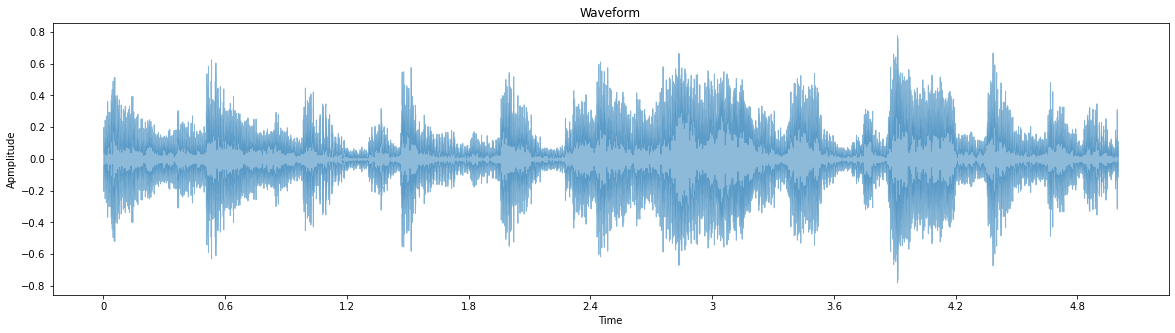

In [38]:
path = './blues.00000.wav'
sample_rate=16000

sig,sr = librosa.load(path,sr=None, # sr=None 파일의 기본 샘플링 속도로 사용 ; default : 22050
                      offset=5,
                      duration=5,
                     )

print(sig,sig.shape)
print(sr)

plt.figure(figsize=(20,5))
librosa.display.waveshow(sig, sr=sr, alpha=0.5)
plt.ylabel('Apmplitude')
plt.xlabel('Time')
plt.title('Waveform')
plt.show()

C:\Users\Mu-jun\AppData\Local\Temp/ipykernel_13780/875723187.py:3: FutureWarning: Pass y=[-0.13705444 -0.16964722 -0.19995117 ...  0.07623291  0.07675171
  0.08129883], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sig, sr,


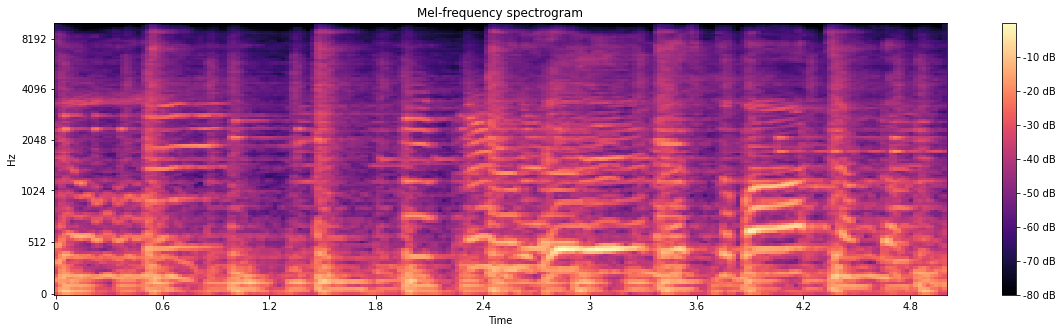

In [40]:
# 멜 스펙트로그램 Mel spectrogram
# mel 필터뱅크 구성을 위한 사용자 지정 인수와 함께 mel-주파수 스펙트로그램 계수 표시(기본값: fmax=sr/2):
S = librosa.feature.melspectrogram(sig, sr, 
                                   n_mels=128, # n_mels 생성할 멜 밴드 수
                                   fmax=10000
                                  )
# 데시벨(dB) 단위로 변환
S_dB = librosa.power_to_db(S, ref=np.max)

fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=10000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

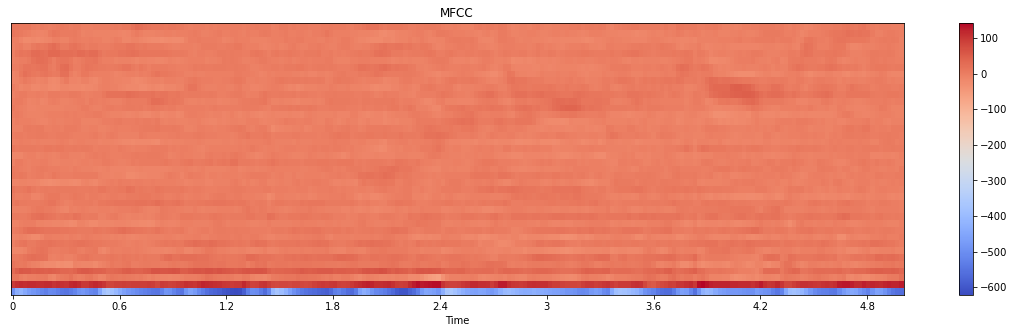

In [47]:
# MFCC(Mel Spectrum Cepstral Coefficient)
# MFCC 시퀸스 (시계열) 생성
mfcc = librosa.feature.mfcc(#y=sig,
                            S=S_dB,
                            sr=sr,
                            n_mfcc=40, # 반환할 MFCC 수 default : 20
                           )
fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
plt.show()

# 다른 홉 길이와 HTK 스타일의 Mel 주파수 사용
# librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)

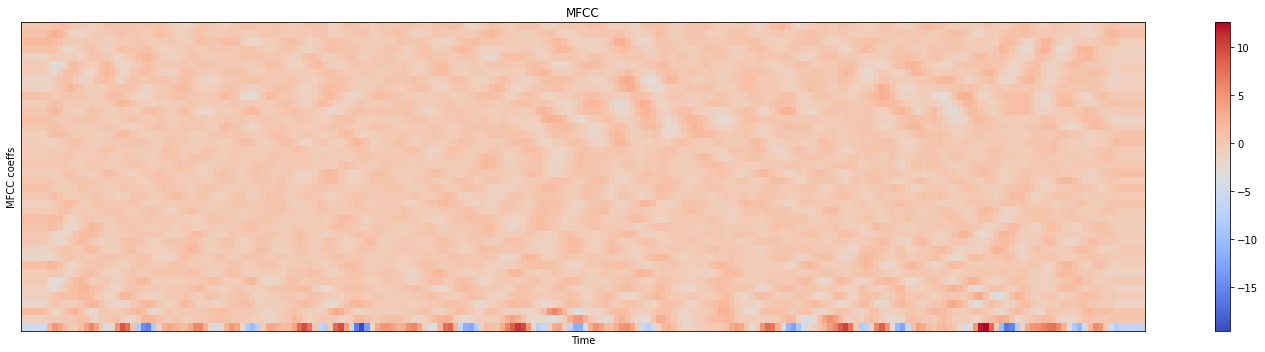

In [50]:
# MFCC델타-델타
# MFCC 궤적을 계산하고 원래 특징 벡터에 추가하면 ASR(자동음성인식)성능이 상당히 향상된다.
delta2_mfcc = librosa.feature.delta(mfcc,
                                    order=2, # 델타 제곱 (가속도), 1 : 델타 (미분)
                                   )

plt.figure(figsize=(20,5))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')

plt.colorbar()
plt.tight_layout()